<h1><b>Entropy of written English</b></h1>

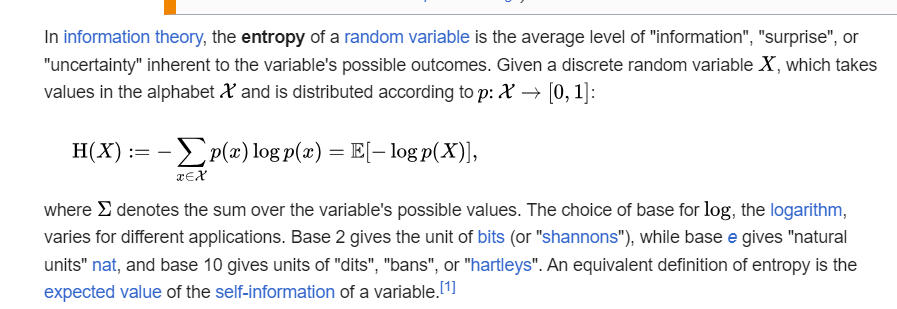

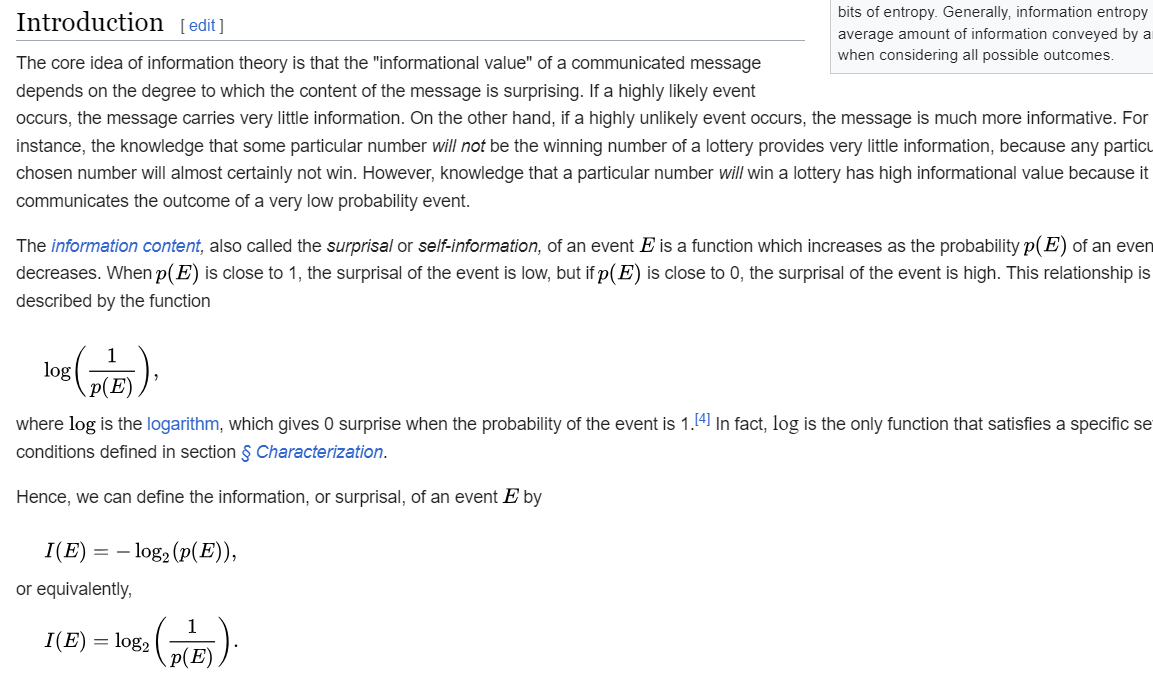

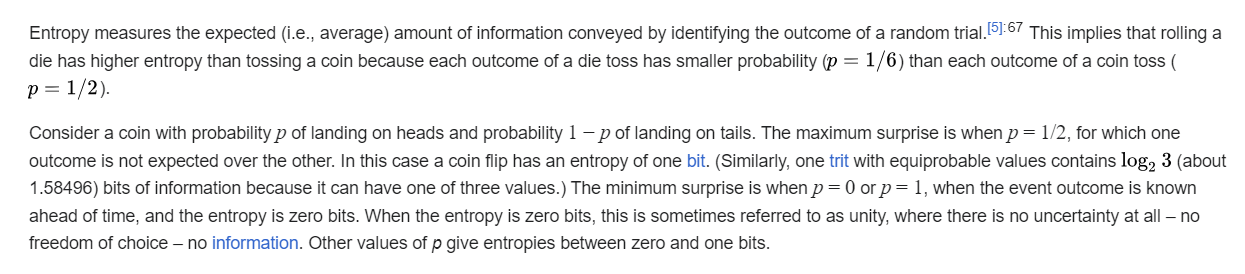

<h2>Application</h2>

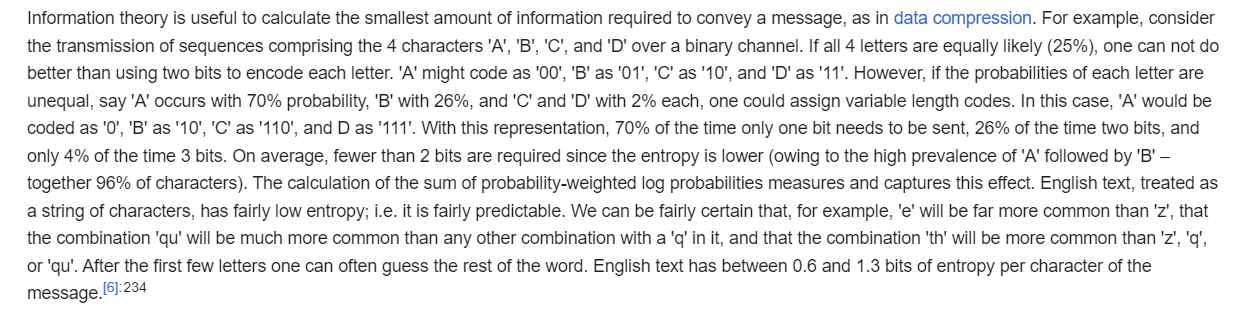

<h2>Definition</h2>

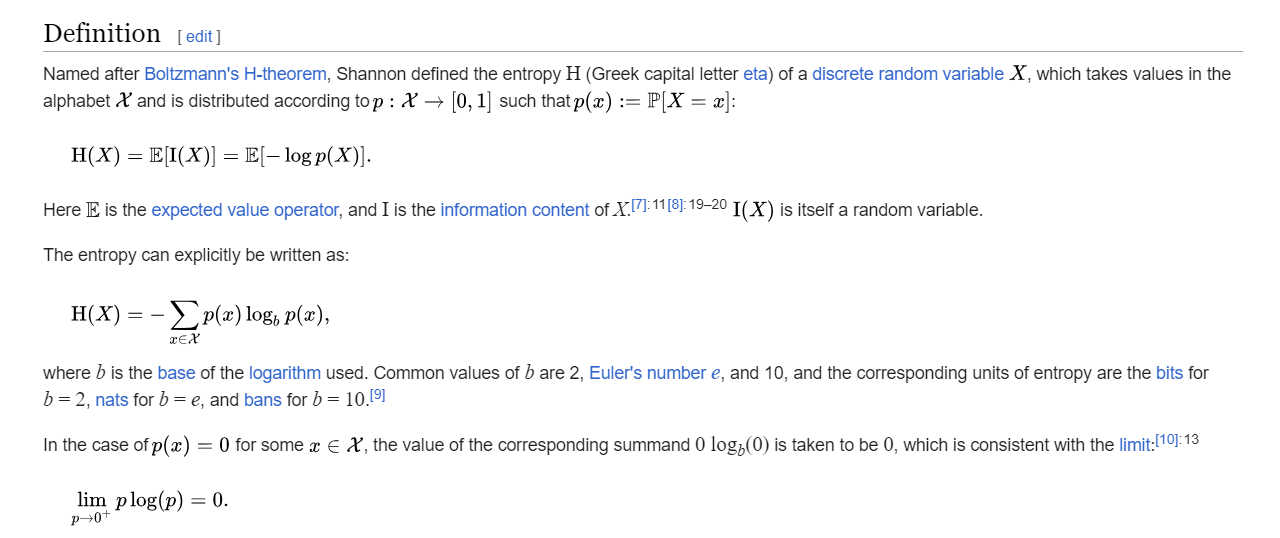

<h3>Importing text from the web</h3>

In [15]:
import requests

response = requests.get('https://gutenberg.org/files/35/35-0.txt')
raw_text = response.text
print(raw_text[:1500])

ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Time Machine

Author: H. G. Wells

Release Date: July, 1992 [eBook #35]
[Most recently updated: October 22, 2020]

Language: English

Character set encoding: UTF-8


*** START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE ***




The Time Machine

An Invention

by H. G. Wells


CONTENTS

 I Introduction
 II The Machine
 III The Time Traveller Returns
 IV Time Travelling
 V In the Golden Age
 VI The Sunset of Mankind
 VII A Sudden Shock
 VIII Explanation
 IX The Morlocks


<h3>Removing punctuation etc.</h3>

In [16]:
import re

text = re.sub(r'[^A-Za-z]+', ' ', raw_text)[1:-1] # removing the first and the last spaces
print(text[:2000])

The Project Gutenberg eBook of The Time Machine by H G Wells This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg org If you are not located in the United States you will have to check the laws of the country where you are located before using this eBook Title The Time Machine Author H G Wells Release Date July eBook Most recently updated October Language English Character set encoding UTF START OF THE PROJECT GUTENBERG EBOOK THE TIME MACHINE The Time Machine An Invention by H G Wells CONTENTS I Introduction II The Machine III The Time Traveller Returns IV Time Travelling V In the Golden Age VI The Sunset of Mankind VII A Sudden Shock VIII Explanation IX The Morlocks X When Night Came XI The Palace of Green Porcelain XII In the Darkness XIII The 

<h3>Distribution of word lengths</h3>

In [17]:
import matplotlib.pyplot as plt
import numpy as np

words = text.split(' ')
word_lengths = np.zeros(40, dtype=int)

for word in words:
    word_lengths[len(word)] += 1

print(word_lengths)

[   0 2333 5915 8006 6258 3894 2815 2523 1561 1260  821  297  225   68
   34    6    3    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


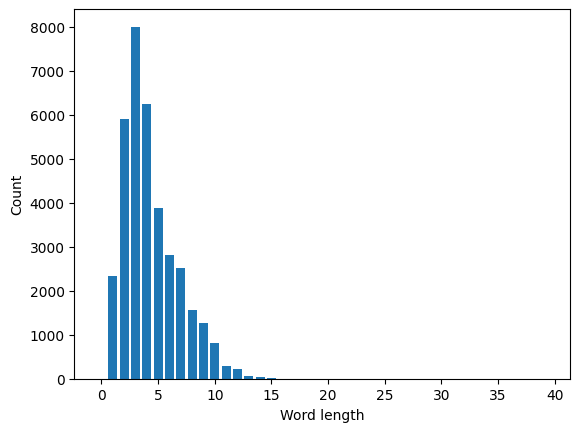

In [18]:
plt.bar(range(len(word_lengths)), word_lengths)
plt.xlabel('Word length')
plt.ylabel('Count')
plt.show()

<h3>Letter frequencies</h3>

In [19]:
import string
alphabet = list(string.ascii_lowercase)

text_lower = text.lower()
ab_len = 26

letter_counts = np.zeros(ab_len, dtype=int)

for i in range(ab_len):
    letter_counts[i] = text_lower.count(alphabet[i])

print(letter_counts)

[12752  2171  4049  6868 19781  3749  3512  8841 11312   187  1231  6658
  4420 11012 11157  2867   106  8895  9313 15155  4328  1435  3524   282
  3024   108]


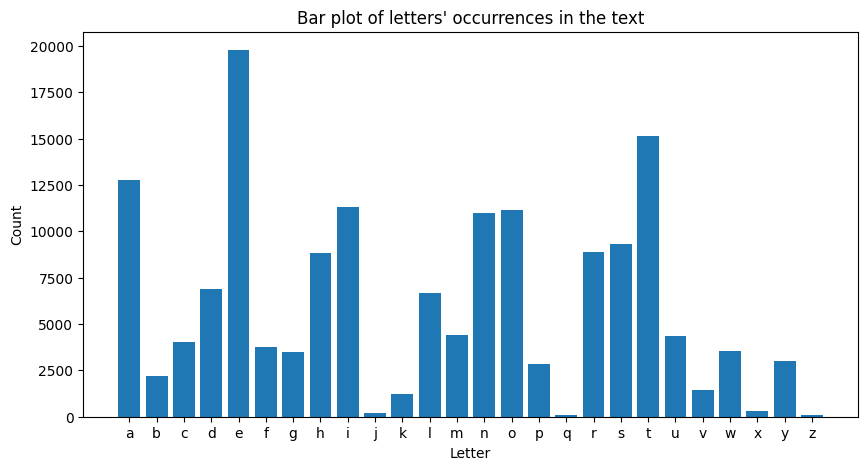

In [20]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.bar(range(ab_len), letter_counts)
ax.set_xticks(range(ab_len), alphabet)
ax.set_xlabel('Letter')
ax.set_ylabel('Count')
ax.set_title("Bar plot of letters' occurrences in the text")
plt.show()

<h3>Calculating the entropy</h3>

In [21]:
n_letters = np.sum(letter_counts)
prob = np.zeros(ab_len)

for i in range(ab_len):
    prob[i] = letter_counts[i]/n_letters

print(f"Number of letters in the text: {n_letters}.")
print(f"\nProbability of each letter's occurence in the text:\n{prob}\n")
print(f"Is the sum of probabilities equal to 1? {np.isclose(np.sum(prob), 1)}")

Number of letters in the text: 156737.

Probability of each letter's occurence in the text:
[0.08135922 0.01385123 0.02583308 0.04381863 0.12620504 0.02391905
 0.02240696 0.05640659 0.07217185 0.00119308 0.00785392 0.0424788
 0.02820011 0.07025782 0.07118294 0.01829179 0.00067629 0.05675112
 0.05941801 0.09669063 0.02761314 0.00915546 0.02248352 0.00179919
 0.01929347 0.00068905]

Is the sum of probabilities equal to 1? True


In [22]:
# adding 10+e-20 to prob in np.log2 prevents us from dealing with np.log2(0)
# it would be helpful in situations when we were to handle events which probability is equal to 0
entropy = -np.sum(prob*np.log2(prob+10e-20))
print(f"The entropy of the text is equal to {entropy:.3f} bits.")

The entropy of the text is equal to 4.173 bits.


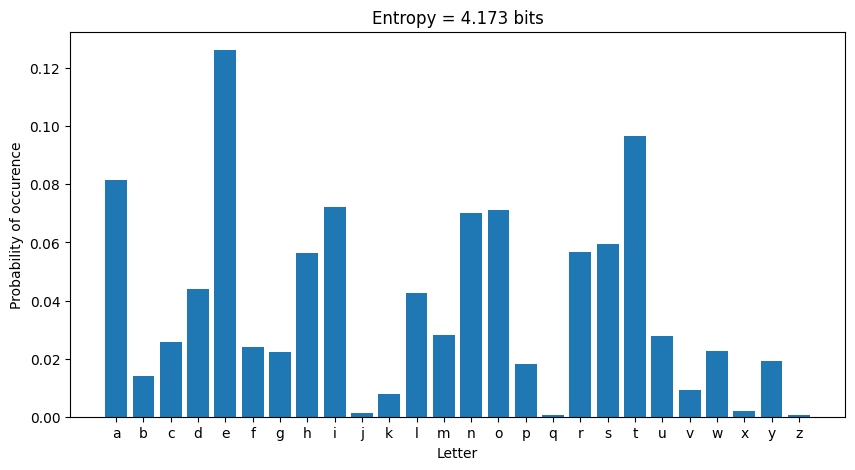

In [23]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.bar(range(ab_len), prob)
ax.set_xticks(range(ab_len), alphabet)
ax.set_xlabel("Letter")
ax.set_ylabel("Probability of occurence")
ax.set_title(f"Entropy = {entropy:.3f} bits")
plt.show()

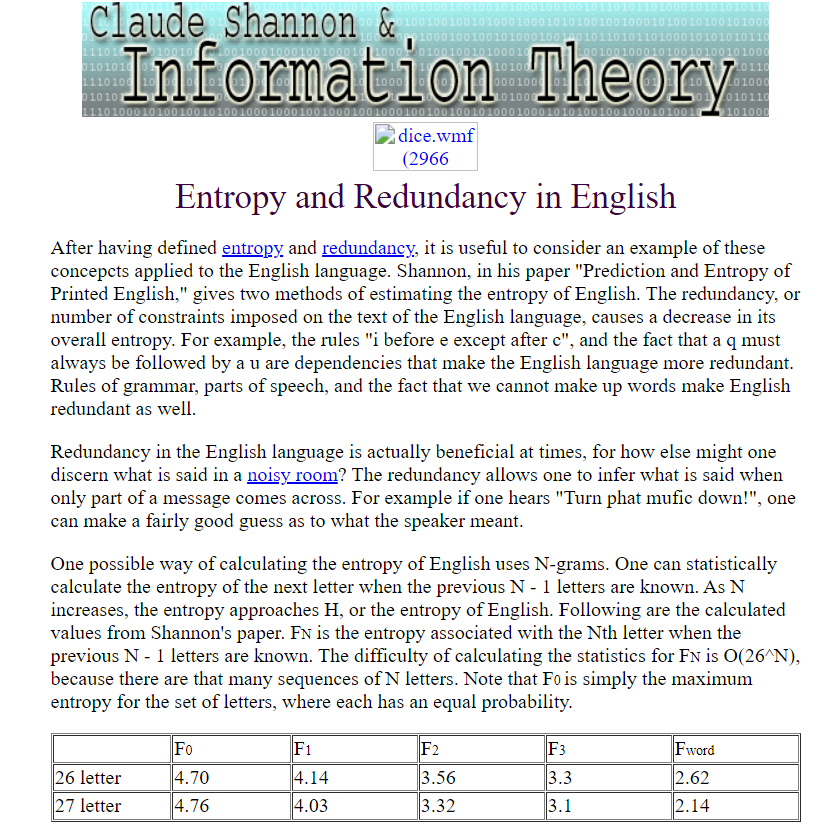

<h4>What is interesting the entropy of modern English is 4.70, while of our text (a book from 150 years ago) is approximately 4.17. <br>As we can see, the entropy of English language has changed over the decades.</h4>

<h2>Conditional entropy</h2>
In the foregoing examples, we treated each letter as if it were totally independent and had nothing to do with other events (letters). It is obviously not true. There are sequential probabilities of letters, so certain letters are more or less likely to appear after certain other letters. For example, there is always U after Q in English language. H is more likely to follow T than X.

In [24]:
prob_matrix = np.zeros((ab_len, ab_len), dtype=int)

for i in range(len(text_lower)-1):
    currlet = text[i]
    nextlet = text[i+1]
    if currlet in alphabet and nextlet in alphabet:
        prob_matrix[alphabet.index(currlet), alphabet.index(nextlet)] += 1   

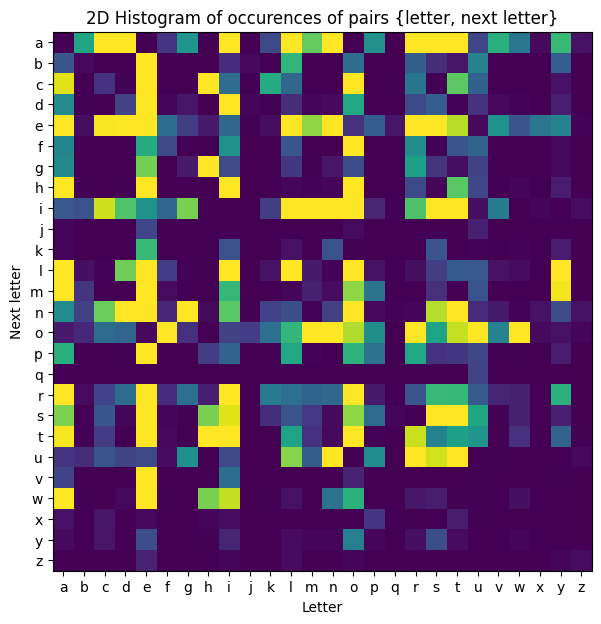

In [25]:
fig, ax =plt.subplots(1, figsize=(7,7))
ax.imshow(prob_matrix, vmax=500)
ax.set_xticks(range(ab_len), alphabet)
ax.set_yticks(range(ab_len), alphabet)
ax.set_xlabel("Letter")
ax.set_ylabel("Next letter")
ax.set_title("2D Histogram of occurences of pairs {letter, next letter}")
plt.show()

<h2>Calculating conditional entropy</h2>

In [26]:
prob_v = np.zeros(ab_len)

for i in range(ab_len):
    probs = prob_matrix[i,:]
    probs = probs/sum(probs)
    prob_v[i] = -np.sum(probs*np.log2(probs+10e-20))

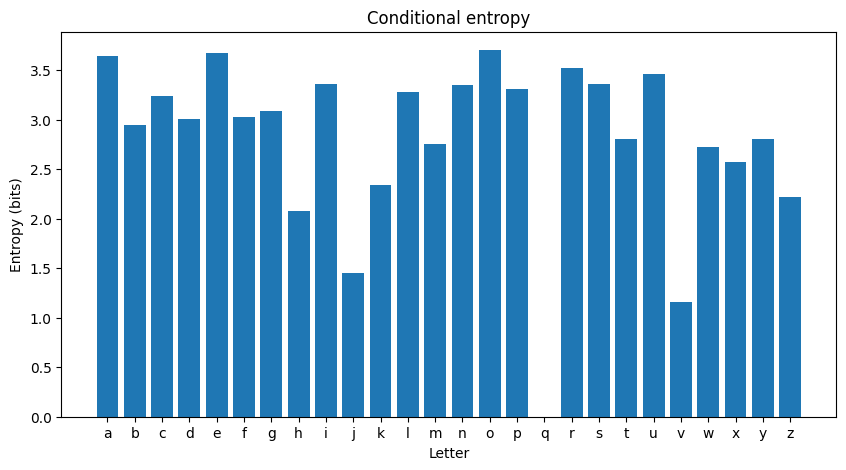

In [27]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.bar(range(ab_len),prob_v)
ax.set_xticks(range(ab_len), alphabet)
ax.set_xlabel("Letter")
ax.set_ylabel("Entropy (bits)")
ax.set_title("Conditional entropy")
plt.show()

<h3>The more diversified the letters after a given letter are, the higher its entropy; 
it gives more information/surprise as something not so predictable may happen after its occurence.<br><br>
For example, <b>vowels</b> seem to have the highest entropy as many other letters may occure after them. <br><br>
On the other hand <b>q</b> has entropy equal to 0, because the only letter that may follow it is u, so from the entropy's perspective this letter gives no additional surprise/information.<br><br>
entropy(q) = -(1*log2(1)) = -1*0 = 0 bits (in calculations we assume that log2(1) = 0)

<h2>World Cloud from our book</h2>
This module randomly selects words from the provided text and creates a world cloud of them.

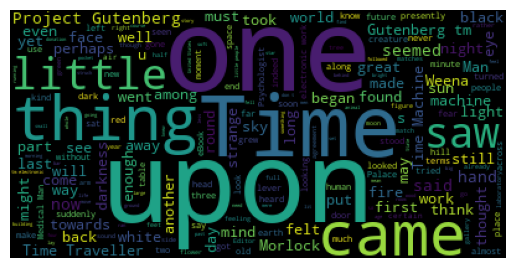

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()